# Accessing values

Now that we know more about images as Numpy arrays, the next questions is how to access the actual pixels values, how to crop an image, split channels etc.

First we load again an image:

In [4]:
import skimage
import matplotlib.pyplot as plt
from microfilm.microplot import microshow
import numpy as np

In [5]:
image = skimage.io.imread('../data/channels1.tif')

In [6]:
image

array([[ 3184,  3130,  3032, ...,  3358,  3169,  3164],
       [ 3215,  3018,  3032, ...,  3443,  2954,  2999],
       [ 3102,  3008,  3192, ...,  3398,  3067,  3203],
       ...,
       [ 3155,  3222,  3176, ...,  3726,  3082,  3029],
       [ 3158,  3257,  3009, ...,  3518,  3285,  3196],
       [ 3174,  3176,  3156, ...,  3733, 22774,     2]], dtype=uint16)

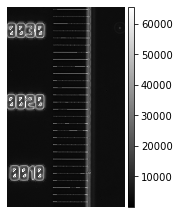

In [7]:
microshow(image, show_colorbar=True);

## Access single values

The first questions is: how do we extract a certain value from the array? Each of the numbers we see above represents a pixel and it has a location (row, column). We can use that location to "extract" the value from the array. For example if we want the top left pixel at ```row=0``` and ```column=0``` we use these coordinates within **square parentheses or brackets**:

In [8]:
image[0,0]

3184

We can now even change that value by reassigning another one:

In [9]:
image[0,0] = 2

In [10]:
image

array([[    2,  3130,  3032, ...,  3358,  3169,  3164],
       [ 3215,  3018,  3032, ...,  3443,  2954,  2999],
       [ 3102,  3008,  3192, ...,  3398,  3067,  3203],
       ...,
       [ 3155,  3222,  3176, ...,  3726,  3082,  3029],
       [ 3158,  3257,  3009, ...,  3518,  3285,  3196],
       [ 3174,  3176,  3156, ...,  3733, 22774,     2]], dtype=uint16)

We see that we have indeed changed the value of that top left pixel!

## Accessing parts of the array

Very often we don't need to access a single pixel, but an entire region. In other terms we want to **crop** the image. Let's look again at the image:

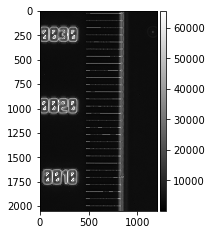

In [11]:
microshow(image, show_colorbar=True, show_axis=True);

Let's say we want to focus our attention on a region in the middle of the image. We can for example take the rows 700-1100 and columns 480-700. Instead of just using single coordinates we can now extract that part of the image using a **range** of pixels, the range being indicated via the ```:``` symbol. Here we write:

In [12]:
image[700:1100, 480:700]

array([[2703, 2663, 2890, ..., 2594, 2472, 2620],
       [2823, 2752, 2589, ..., 2684, 2552, 2582],
       [2577, 2599, 2582, ..., 2517, 2516, 2601],
       ...,
       [2862, 2892, 3050, ..., 2800, 2922, 2850],
       [2867, 2905, 2820, ..., 2794, 2882, 2771],
       [2848, 2994, 2885, ..., 2695, 2757, 2777]], dtype=uint16)

We can store this new smaller array into a new variable:

In [13]:
cropped = image[700:1100, 480:700].copy()

**Note that we additionally use here the ```copy``` method. This ensures that whatever modification we make to the cropped version doesn't affect the original image!**.

We can again plot this cropped image:

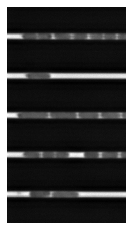

In [14]:
microshow(cropped);

We can also check again the size of this cropped image. We expect 400 rows and 220 columns:

In [15]:
cropped.shape

(400, 220)

If instead of selecting both rows and columns we only want to select a range of rows and take **all** columns, we can just use ```:``` alone:

In [16]:
image[400:530, :].shape

(130, 1200)

We can also leave out the *end* boundary and then it takes all the rows/columns from a certain index to the last one:

In [17]:
image[400:, :].shape

(1648, 1200)

## Multi-dimensional images

We have until now focused on 2D images. However, what is true about selecting pixels or ranges of pixels, is also true for other dimensions. Let's load again our multi-D image:

In [18]:
image_nd = skimage.io.imread('../data/drosophila_embryo_30567.tif')

In [19]:
image_nd.shape

(31, 5, 2, 206, 246)

We know for example that the first axis is time. So if we want to keep only the first time point, we can again slice the array:

In [20]:
image_t0 = image_nd[0, :, : , :, :]

image_t0.shape

(5, 2, 206, 246)

As expected, as we have selected a single time point, that dimension (of size 1 now) is gone, and we have volume (5 planes) with two channels. We can extend this and specify that we want to access the first time point of the third plane in the z-stack:

In [21]:
image_sel = image_nd[0, 2, : , :, :]
image_sel.shape

(2, 206, 246)

Ranges work of course too. We might want to keep only the first three time points and 3 planes in the middle of the stack:

In [22]:
image_range = image_nd[0:3, 2:4, : , :, :]
image_range.shape

(3, 2, 2, 206, 246)

## Exercise

1. Load one of the image in ```coli_nucl_ori_ter_raw.tif```
2. Check the image shape
3. The dimensions are ```T x X x Y x C```: make a copy of the second channel of the first time point
4. Display it
5. Make a crop of your choice in the image and display it